## CSCI S-89 Introduction to Deep Learning, Summer 2020
### Section 1

### Part I: Examples of fully connected Deep Neural Networks built with Keras

In [14]:
from keras import layers
from keras import models

### 1) NN with 2 inputs, 1 hidden layer with 2 neurons, and 1 continuous output

In [21]:
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='relu'))
          
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### 2) NN with 900 inputs, 2 hidden layers with 100 neurons, and 1 continuous output

In [19]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(900,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
          
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               90100     
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 100,301
Trainable params: 100,301
Non-trainable params: 0
_________________________________________________________________


### Part II:  Handwritten digit recognition with fully connected Deep Neural Network

We first consider images of 10 types (handwritten digits from "0" to "9") and build a feedforward fully connected Deep Neural Network for classification of the images (the accuracy, in fact, can further be increased by adding convolutional layers).  

Let's load libraries:

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import time
import pickle

from keras.layers import Dropout
from keras.layers import LeakyReLU

In [22]:
with open('handwritten_digits.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

Here, 'X_train' and 'X_test' are the sets of 28x28 images; and 'y_train' and 'y_test' are the corresponding correct labels. For example, let's look at the first 18 images in 'X_train' dataset:

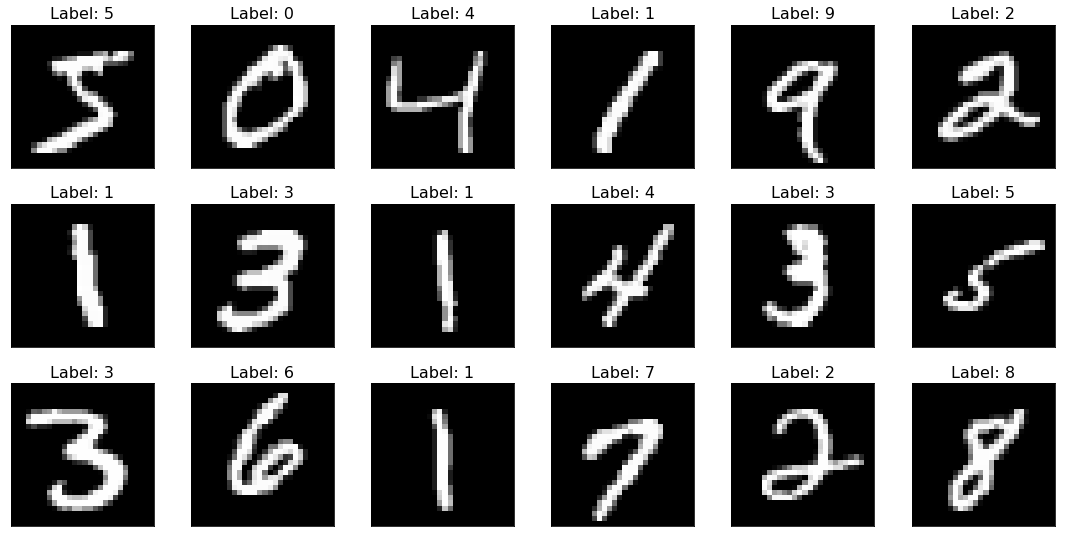

In [23]:
fig = plt.figure(figsize=(15,8))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Label: {}".format(y_train[i]),fontsize=16)
    plt.xticks([])
    plt.yticks([])
plt.show()

Let's reshape the images (we would not need to reshape in case of Convolutional Neural Network) which will be inputs to the Neural Network:

In [24]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Let's also rescale the inputs:

In [25]:
X_train /= 255
X_test /= 255

Because we want to classify, let's create dummies for the output:

In [26]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [27]:
y_train.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0


Let's now build a Neural Network and train it:

In [28]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))                          
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
          
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [29]:
nepochs = 35
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train,
          batch_size=128, epochs=nepochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [==============================] - 10s 173us/step - loss: 0.2526 - accuracy: 0.9229 - val_loss: 0.0990 - val_accuracy: 0.9679
Epoch 2/35
60000/60000 [==============================] - 10s 162us/step - loss: 0.1025 - accuracy: 0.9685 - val_loss: 0.0778 - val_accuracy: 0.9755
Epoch 3/35
60000/60000 [==============================] - 10s 175us/step - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.0717 - val_accuracy: 0.9771
Epoch 4/35
60000/60000 [==============================] - 10s 171us/step - loss: 0.0568 - accuracy: 0.9815 - val_loss: 0.0678 - val_accuracy: 0.9794
Epoch 5/35
60000/60000 [==============================] - 10s 164us/step - loss: 0.0451 - accuracy: 0.9853 - val_loss: 0.0733 - val_accuracy: 0.9789
Epoch 6/35
60000/60000 [==============================] - 10s 169us/step - loss: 0.0400 - accuracy: 0.9868 - val_loss: 0.0712 - val_accuracy: 0.9796
Epoch 7/35
60000/60000 [==============================] 

<Figure size 432x288 with 0 Axes>

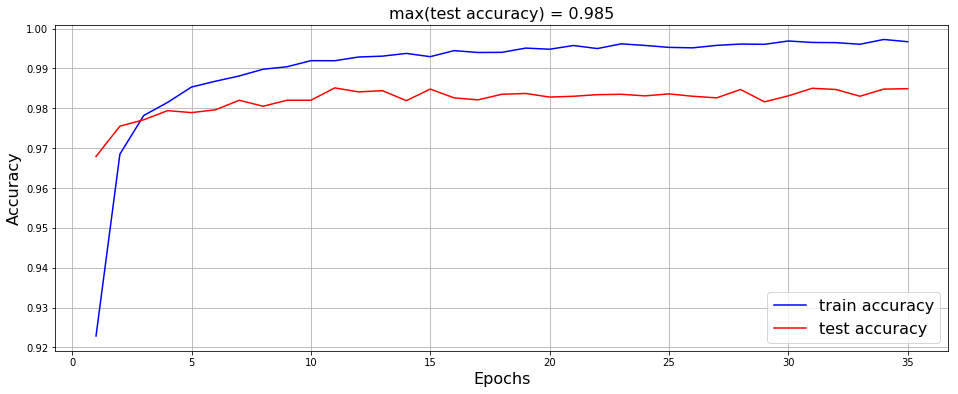

In [34]:
plt.clf()
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(16,6))
plt.plot(range(1,nepochs+1), train_acc, 'b', label='train accuracy',color="blue")
plt.plot(range(1,nepochs+1), test_acc, 'b', label='test accuracy',color="red")

plt.title('max(test accuracy) = ' + str(round(max(test_acc),3)),fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.grid(True)
plt.legend(loc = 'lower right',fontsize=16)

plt.show()

Let's now classify the images the Neural Network has not seen:

In [35]:
y_test_hat = model.predict_classes(X_test)

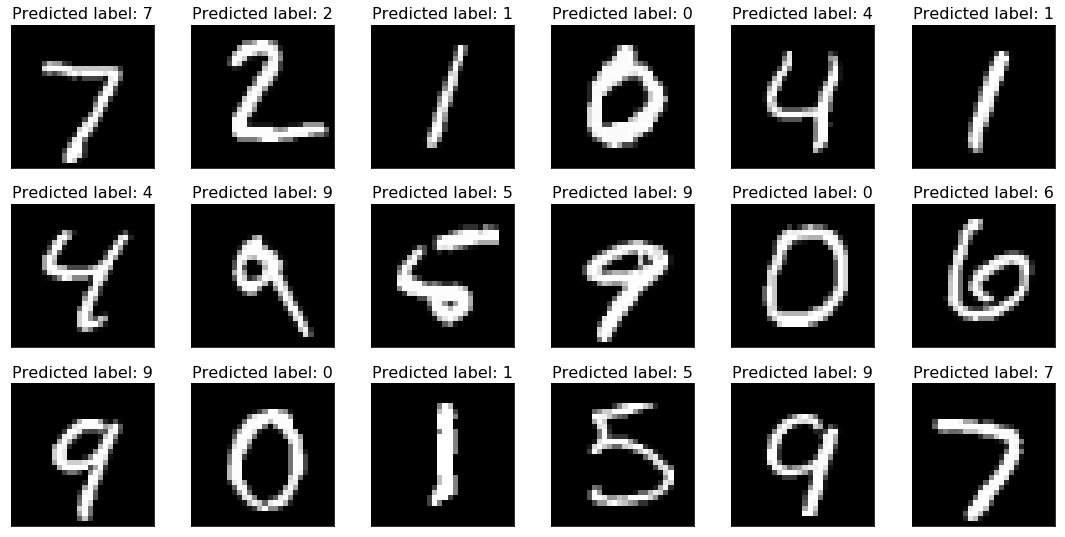

In [36]:
fig = plt.figure(figsize=(15,8))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(X_test.reshape((-1,28,28))[i], cmap='gray', interpolation='none')
    plt.title("Predicted label: {}".format(y_test_hat[i]),fontsize=16)
    plt.xticks([])
    plt.yticks([])
plt.show()